### Crime Dataset preperation to Calculate Crime Rate

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


# reading csv file
dataset = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")
dataset.head()

pop_ds = pd.read_csv("India Population Growth by Census data.csv")

In [2]:
pop_ds

,STATE,DISTRICT,2011,2001,% Change in population,% increase per year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014
0,ANDHRA PRADESH,ADILABAD,2741239,2488003,10.18,1.017828,2513327,2538908,2564750,2590854,2617225,2643864,2670774,2697958,2725418,2.769140e+06,2.797325e+06,2.825797e+06
1,UTTAR PRADESH,AGRA,4418797,3620436,22.05,2.205152,3700272,3781869,3865265,3950500,4037614,4126650,4217648,4310654,4405710,4.516238e+06,4.615828e+06,4.717614e+06
2,GUJARAT,AHMADABAD,7214225,5816519,24.03,2.402994,5956290,6099419,6245988,6396078,6549776,6707166,6868339,7033385,7202397,7.387582e+06,7.565106e+06,7.746895e+06
3,MAHARASHTRA,AHMADNAGAR,4543159,4040642,12.44,1.243656,4090894,4141770,4193280,4245430,4298228,4351683,4405803,4460597,4516071,4.599660e+06,4.656864e+06,4.714780e+06
4,MIZORAM,AIZAWL,400309,325676,22.92,2.291633,333139,340774,348583,356571,364742,373101,381651,390397,399344,4.094826e+05,4.188665e+05,4.284653e+05
5,RAJASTHAN,AJMER,2583052,2181670,18.40,1.839792,2221808,2262685,2304314,2346708,2389883,2433852,2478629,2524231,2570672,2.630575e+06,2.678972e+06,2.728259e+06
6,MAHARASHTRA,AKOLA,1813906,1630239,11.27,1.126626,1648606,1667179,1685962,1704957,1724165,1743590,1763234,1783099,1803188,1.834342e+06,1.855008e+06,1.875907e+06
7,KERALA,ALAPUZHA,2127789,2109160,0.88,0.088324,2111023,2112887,2114754,2116621,2118491,2120362,2122235,2124109,2125985,2.129668e+06,2.131549e+06,2.133432e+06
8,UTTAR PRADESH,ALIGARH,3673889,2992286,22.78,2.277867,3060446,3130159,3201460,3274385,3348971,3425256,3503279,3583079,3664697,3.757575e+06,3.843168e+06,3.930710e+06
9,MADHYA PRADESH,ALIRAJPUR,728999,2992286,-75.64,-7.563739,2765957,2556748,2363362,2184603,2019366,1866626,1725439,1594932,1474295,6.738594e+05,6.228905e+05,5.757766e+05


In [3]:
#removing column which has total of other two columns
# for example. Theft = AUTO Theft + Total Theft, thus removing Theft column

ds_crime = dataset.drop(['RAPE','THEFT','KIDNAPPING AND ABDUCTION'],axis=1)
for x in ds_crime.columns:
    print(str(x)+", ")   

STATE, 
DISTRICT, 
YEAR, 
MURDER, 
ATTEMPT TO MURDER, 
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER, 
CUSTODIAL RAPE, 
OTHER RAPE, 
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS, 
KIDNAPPING AND ABDUCTION OF OTHERS, 
DACOITY, 
PREPARATION AND ASSEMBLY FOR DACOITY, 
ROBBERY, 
BURGLARY, 
AUTO THEFT, 
OTHER THEFT, 
RIOTS, 
CRIMINAL BREACH OF TRUST, 
CHEATING, 
COUNTERFIETING, 
ARSON, 
HURT/GREVIOUS HURT, 
DOWRY DEATHS, 
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY, 
INSULT TO MODESTY OF WOMEN, 
CRUELTY BY HUSBAND OR HIS RELATIVES, 
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES, 
CAUSING DEATH BY NEGLIGENCE, 
OTHER IPC CRIMES, 
TOTAL IPC CRIMES, 


In [4]:
# years = [2001]#,2002,2003]
# ds_crime = ds_crime[ds_crime['YEAR'].isin(years)]

In [5]:
np.unique(ds_crime['YEAR'])

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012])

#### Basic Preprocessing of Dataset

In [6]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

# # Label encoding  for STATE/UT and DISTRICT
# le.fit(ds_crime['STATE/UT'])

# ds_crime.iloc[:,0] = le.fit_transform(ds_crime['STATE/UT']) 

# le.fit(ds_crime['DISTRICT'])

# ds_crime.iloc[:,1] = le.fit_transform(ds_crime['DISTRICT']) 

In [7]:
ds_state = list(ds_crime.groupby('STATE').groups.keys())
pop_state = np.unique(pop_ds['STATE'])
print(f"ds_state : {np.size(ds_state)} pop_state: {np.size(pop_state)}")
print(type(ds_state))
print(type(pop_state))
d = {'ds_state': ds_state, 'pop_state': pop_state}
df = pd.DataFrame(data=d)
np.size(df.loc[(df['ds_state'] != df['pop_state'])])

ds_state : 35 pop_state: 35
<class 'list'>
<class 'numpy.ndarray'>


0

In [8]:
ds_gpstate = ds_crime.groupby('STATE')
pop_gpstate = pop_ds.groupby('STATE')
ds_gpstate.groups.keys()
# ['ANDAMAN AND NICOBAR ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 
#  'CHHATTISGARH', 'DADRA AND NAGAR HAVELI', 'DAMAN AND DIU', 'GOA', 'GUJARAT', 'HARYANA',
#  'HIMACHAL PRADESH', 'JAMMU AND KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP',
#  'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'NCT OF DELHI',
#  'ORISSA', 'PONDICHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 
#  'UTTARAKHAND', 'WEST BENGAL']

dict_keys(['ANDAMAN AND NICOBAR ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'DADRA AND NAGAR HAVELI', 'DAMAN AND DIU', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU AND KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'NCT OF DELHI', 'ORISSA', 'PONDICHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'])

In [9]:
pop_ds = pop_ds.drop(columns=['% Change in population','% increase per year'])

In [10]:
pop_tran = pd.melt(pop_ds, id_vars=["STATE", "DISTRICT"], var_name="YEAR", value_name="POPULATION")
pop_tran.to_excel("Population_transpose.xlsx")
pop_tran = pd.read_excel("Population_transpose.xlsx")

In [11]:
pop_ds

,STATE,DISTRICT,2011,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014
0,ANDHRA PRADESH,ADILABAD,2741239,2488003,2513327,2538908,2564750,2590854,2617225,2643864,2670774,2697958,2725418,2.769140e+06,2.797325e+06,2.825797e+06
1,UTTAR PRADESH,AGRA,4418797,3620436,3700272,3781869,3865265,3950500,4037614,4126650,4217648,4310654,4405710,4.516238e+06,4.615828e+06,4.717614e+06
2,GUJARAT,AHMADABAD,7214225,5816519,5956290,6099419,6245988,6396078,6549776,6707166,6868339,7033385,7202397,7.387582e+06,7.565106e+06,7.746895e+06
3,MAHARASHTRA,AHMADNAGAR,4543159,4040642,4090894,4141770,4193280,4245430,4298228,4351683,4405803,4460597,4516071,4.599660e+06,4.656864e+06,4.714780e+06
4,MIZORAM,AIZAWL,400309,325676,333139,340774,348583,356571,364742,373101,381651,390397,399344,4.094826e+05,4.188665e+05,4.284653e+05
5,RAJASTHAN,AJMER,2583052,2181670,2221808,2262685,2304314,2346708,2389883,2433852,2478629,2524231,2570672,2.630575e+06,2.678972e+06,2.728259e+06
6,MAHARASHTRA,AKOLA,1813906,1630239,1648606,1667179,1685962,1704957,1724165,1743590,1763234,1783099,1803188,1.834342e+06,1.855008e+06,1.875907e+06
7,KERALA,ALAPUZHA,2127789,2109160,2111023,2112887,2114754,2116621,2118491,2120362,2122235,2124109,2125985,2.129668e+06,2.131549e+06,2.133432e+06
8,UTTAR PRADESH,ALIGARH,3673889,2992286,3060446,3130159,3201460,3274385,3348971,3425256,3503279,3583079,3664697,3.757575e+06,3.843168e+06,3.930710e+06
9,MADHYA PRADESH,ALIRAJPUR,728999,2992286,2765957,2556748,2363362,2184603,2019366,1866626,1725439,1594932,1474295,6.738594e+05,6.228905e+05,5.757766e+05


In [12]:
final_data = pd.merge(ds_crime,pop_tran,how='left',on=['STATE','DISTRICT','YEAR'])
final_data.to_excel("final_dataset.xlsx")
crime_dataset = pd.read_excel("final_dataset.xlsx")
crime_dataset.columns.values

array(['STATE', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN',
       'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES',
       'TOTAL IPC CRIMES', 'POPULATION'], dtype=object)

In [14]:
#crime rate
crime_dataset["CRIME RATE"] = (crime_dataset['TOTAL IPC CRIMES'] / crime_dataset['POPULATION']) * 100000

In [15]:
crime_dataset = crime_dataset.dropna()
crime_dataset.describe()
crime_dataset

,STATE,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,POPULATION,CRIME RATE
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,0,50,30,16,...,16,149,34,175,0,181,1518,4154,2.488003e+06,166.961213
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,0,23,30,23,...,7,118,24,154,0,270,754,4125,3.640478e+06,113.309296
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,0,27,34,25,...,14,112,83,186,0,404,1262,5818,3.745875e+06,155.317516
6,ANDHRA PRADESH,GUNTUR,2001,182,88,2,0,54,51,31,...,7,139,129,378,0,369,2426,7848,4.465144e+06,175.761409
7,ANDHRA PRADESH,HYDERABAD,2001,111,113,7,0,37,39,41,...,24,118,27,746,0,409,1512,11831,3.829753e+06,308.923317
8,ANDHRA PRADESH,KARIMNAGAR,2001,162,85,6,0,56,49,18,...,62,414,81,224,0,322,1726,5811,3.491822e+06,166.417418
9,ANDHRA PRADESH,KHAMMAM,2001,93,60,1,0,47,30,11,...,17,180,336,172,0,209,1450,4582,2.578927e+06,177.670791
10,ANDHRA PRADESH,KRISHNA,2001,65,51,0,0,37,21,15,...,10,208,72,265,0,268,862,4779,4.187841e+06,114.116080
11,ANDHRA PRADESH,KURNOOL,2001,133,72,4,0,29,47,0,...,13,141,107,92,0,292,1401,4581,3.529494e+06,129.791976
12,ANDHRA PRADESH,MAHBUBNAGAR,2001,157,67,26,0,59,27,15,...,14,176,41,69,0,280,2158,4819,3.513934e+06,137.139741


/home/srishtee/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


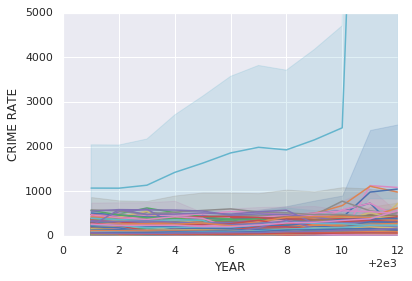

In [16]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()
# plt.figure(figsize=(20,20))
groupby_state_dist_year = crime_dataset.groupby(by=['STATE','DISTRICT'])
# groupby_state_dist_year.get_group().
for (m,v) in groupby_state_dist_year:
#     print(m)    
    sns.lineplot(x="YEAR", y="CRIME RATE", data=v)
#     sns.distplot(v['CRIME RATE'])
#     plt.xlim(-10,600)
    plt.ylim(0,5000)
#     break

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Label encoding  for STATE/UT and DISTRICT
le.fit(crime_dataset['STATE'])

crime_dataset.iloc[:,0] = le.fit_transform(crime_dataset['STATE']) 

le.fit(crime_dataset['DISTRICT'])

crime_dataset.iloc[:,1] = le.fit_transform(crime_dataset['DISTRICT']) 
crime_dataset

/home/srishtee/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,STATE,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,POPULATION,CRIME RATE
0,1,0,2001,101,60,17,0,50,30,16,...,16,149,34,175,0,181,1518,4154,2.488003e+06,166.961213
1,1,19,2001,151,125,1,0,23,30,23,...,7,118,24,154,0,270,754,4125,3.640478e+06,113.309296
2,1,109,2001,101,57,2,0,27,34,25,...,14,112,83,186,0,404,1262,5818,3.745875e+06,155.317516
6,1,196,2001,182,88,2,0,54,51,31,...,7,139,129,378,0,369,2426,7848,4.465144e+06,175.761409
7,1,216,2001,111,113,7,0,37,39,41,...,24,118,27,746,0,409,1512,11831,3.829753e+06,308.923317
8,1,274,2001,162,85,6,0,56,49,18,...,62,414,81,224,0,322,1726,5811,3.491822e+06,166.417418
9,1,285,2001,93,60,1,0,47,30,11,...,17,180,336,172,0,209,1450,4582,2.578927e+06,177.670791
10,1,313,2001,65,51,0,0,37,21,15,...,10,208,72,265,0,268,862,4779,4.187841e+06,114.116080
11,1,318,2001,133,72,4,0,29,47,0,...,13,141,107,92,0,292,1401,4581,3.529494e+06,129.791976
12,1,343,2001,157,67,26,0,59,27,15,...,14,176,41,69,0,280,2158,4819,3.513934e+06,137.139741


In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scalar = MinMaxScaler()
# crime_dataset = pd.DataFrame(scalar.fit_transform(crime_dataset))
# groupby_state_dist_year = crime_dataset.groupby(by=['STATE','DISTRICT'])

state_city_norm_df = []
i = 0
for (m,v) in groupby_state_dist_year:
#     print(v.iloc[:,2:])    
    normalized_crime  = scalar.fit_transform(v.iloc[:,-1:])
    v["STATE DIST NORM"] =   normalized_crime
    state_city_norm_df.append(v)

state_city_norm_df = pd.concat(state_city_norm_df)

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/srishtee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [19]:
state_city_norm_df

,STATE,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,POPULATION,CRIME RATE,STATE DIST NORM
663,0,21,2001,13,0,0,0,3,2,0,...,18,1,9,0,0,310,637,3.140840e+05,202.811987,0.140450
1349,0,21,2002,14,3,0,0,1,1,1,...,16,3,4,0,0,316,580,2.932350e+05,197.793579,0.132270
2046,0,21,2003,16,4,1,0,2,2,0,...,9,2,7,0,0,299,611,2.737710e+05,223.179226,0.173649
2743,0,21,2004,13,1,2,0,10,3,0,...,5,3,5,0,6,373,721,2.555980e+05,282.083584,0.269665
3444,0,21,2005,14,3,3,0,4,1,1,...,10,1,5,0,3,354,666,2.386310e+05,279.091987,0.264789
4151,0,21,2006,3,4,1,0,6,5,0,...,12,4,7,0,2,311,655,2.227910e+05,293.997513,0.289085
5586,0,21,2008,8,10,2,0,12,13,3,...,24,3,25,0,4,374,859,1.941950e+05,442.338886,0.530886
6321,0,21,2009,15,4,3,0,18,14,2,...,29,7,21,0,2,440,921,1.813050e+05,507.983784,0.637889
7067,0,21,2010,8,7,4,0,23,8,2,...,31,10,9,0,9,479,956,1.692700e+05,564.778165,0.730465
7825,0,21,2011,14,5,2,0,13,12,3,...,14,3,5,0,6,382,771,1.055970e+05,730.134379,1.000000


In [20]:
import statistics 
mean_of_crimerate = statistics.median(state_city_norm_df["STATE DIST NORM"])
state_city_norm_df["VIOLENCE RATING"] = np.where(state_city_norm_df['STATE DIST NORM'] < mean_of_crimerate, 0, 1)
state_city_norm_df.to_excel("final_crime_data_dataset.xlsx")

In [21]:
state_city_norm_df

,STATE,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,POPULATION,CRIME RATE,STATE DIST NORM,VIOLENCE RATING
663,0,21,2001,13,0,0,0,3,2,0,...,1,9,0,0,310,637,3.140840e+05,202.811987,0.140450,0
1349,0,21,2002,14,3,0,0,1,1,1,...,3,4,0,0,316,580,2.932350e+05,197.793579,0.132270,0
2046,0,21,2003,16,4,1,0,2,2,0,...,2,7,0,0,299,611,2.737710e+05,223.179226,0.173649,0
2743,0,21,2004,13,1,2,0,10,3,0,...,3,5,0,6,373,721,2.555980e+05,282.083584,0.269665,0
3444,0,21,2005,14,3,3,0,4,1,1,...,1,5,0,3,354,666,2.386310e+05,279.091987,0.264789,0
4151,0,21,2006,3,4,1,0,6,5,0,...,4,7,0,2,311,655,2.227910e+05,293.997513,0.289085,0
5586,0,21,2008,8,10,2,0,12,13,3,...,3,25,0,4,374,859,1.941950e+05,442.338886,0.530886,1
6321,0,21,2009,15,4,3,0,18,14,2,...,7,21,0,2,440,921,1.813050e+05,507.983784,0.637889,1
7067,0,21,2010,8,7,4,0,23,8,2,...,10,9,0,9,479,956,1.692700e+05,564.778165,0.730465,1
7825,0,21,2011,14,5,2,0,13,12,3,...,3,5,0,6,382,771,1.055970e+05,730.134379,1.000000,1
